In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/Data/processed/data_20240905_171058.csv')

In [3]:
df

,Timestamp,Rainfall at Nayabazar - Namsaling,Rainfall at Sandakpur - Valley,Water Level at Mai Khola,Rainfall at Mai Beni,Rainfall at Pashupatingar,Rainfall at Sandakpur - Hilltop
0,2024-09-02T00:00:00+00:00,0.0,0.0,NaN,0.0,0.0,0.0
1,2024-09-02T00:05:00+00:00,NaN,NaN,1.341000,0.0,0.0,0.0
2,2024-09-02T00:15:00+00:00,0.0,0.0,1.342999,0.0,0.0,0.0
3,2024-09-02T00:25:00+00:00,NaN,NaN,1.346999,0.0,0.0,0.0
4,2024-09-02T00:30:00+00:00,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...
662,2024-09-05T10:45:00+00:00,0.0,0.0,1.476000,0.0,0.0,0.0
663,2024-09-05T10:55:00+00:00,NaN,NaN,1.473000,0.0,0.0,0.0
664,2024-09-05T11:00:00+00:00,0.0,0.0,NaN,0.0,0.0,0.0
665,2024-09-05T11:05:00+00:00,NaN,NaN,1.466000,0.0,0.0,0.0


In [4]:
df.isna().sum()

Timestamp                              0
Rainfall at Nayabazar - Namsaling    333
Rainfall at Sandakpur - Valley       333
Water Level at Mai Khola             167
Rainfall at Mai Beni                   0
Rainfall at Pashupatingar              0
Rainfall at Sandakpur - Hilltop        0
dtype: int64

In [5]:
def reorder_dataframe(df):
    df_reorder = df.iloc[:,[0,4,1,5,2,3]]
    return df_reorder
df_reordered = reorder_dataframe(df)

In [6]:
df_reordered

,Timestamp,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
0,2024-09-02T00:00:00+00:00,0.0,0.0,0.0,0.0,NaN
1,2024-09-02T00:05:00+00:00,0.0,NaN,0.0,NaN,1.341000
2,2024-09-02T00:15:00+00:00,0.0,0.0,0.0,0.0,1.342999
3,2024-09-02T00:25:00+00:00,0.0,NaN,0.0,NaN,1.346999
4,2024-09-02T00:30:00+00:00,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
662,2024-09-05T10:45:00+00:00,0.0,0.0,0.0,0.0,1.476000
663,2024-09-05T10:55:00+00:00,0.0,NaN,0.0,NaN,1.473000
664,2024-09-05T11:00:00+00:00,0.0,0.0,0.0,0.0,NaN
665,2024-09-05T11:05:00+00:00,0.0,NaN,0.0,NaN,1.466000


In [7]:
df_reordered.isna().sum()

Timestamp                              0
Rainfall at Mai Beni                   0
Rainfall at Nayabazar - Namsaling    333
Rainfall at Pashupatingar              0
Rainfall at Sandakpur - Valley       333
Water Level at Mai Khola             167
dtype: int64

In [8]:
df_reordered.shape

(667, 6)

In [9]:
df_reordered.describe()

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
count,667.0,334.000000,667.0,334.000000,500.000000
mean,0.0,0.195210,0.0,0.107784,1.398554
std,0.0,1.402863,0.0,0.652553,0.081379
min,0.0,0.000000,0.0,0.000000,1.233999
25%,0.0,0.000000,0.0,0.000000,1.341000
50%,0.0,0.000000,0.0,0.000000,1.377000
75%,0.0,0.000000,0.0,0.000000,1.437249
max,0.0,23.200001,0.0,8.800000,1.729000


In [10]:
from datetime import datetime, timedelta
original_timestamp = datetime.strptime("2024-09-02 00:00:00+00:00", "%Y-%m-%d %H:%M:%S%z")
future_timestamp = original_timestamp +timedelta(hours=1)

print(f"Original timestamp: {original_timestamp}")
print(f"Timestamp after adding 1 hour: {future_timestamp}")

formatted_future_timestamp = future_timestamp.strftime("%Y-%m-%d %H:%M:%S%z")
print(f"Formatted future timestamp: {formatted_future_timestamp}")

Original timestamp: 2024-09-02 00:00:00+00:00
Timestamp after adding 1 hour: 2024-09-02 01:00:00+00:00
Formatted future timestamp: 2024-09-02 01:00:00+0000


In [11]:
def convert_timestamps(df, column_name, target_format='%Y-%m-%d %H:%M:%S'):
    """
    Convert timestamps in a specified column of a DataFrame to a target format.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame
    column_name (str): The name of the column containing timestamps
    target_format (str): The desired output format (default: '%Y-%m-%d %H:%M:%S')
    
    Returns:
    pandas.DataFrame: A new DataFrame with the converted timestamps
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Convert the specified column to datetime
    df_copy[column_name] = pd.to_datetime(df_copy[column_name], utc=True)
    
    # Convert to the target format
    df_copy[column_name] = df_copy[column_name].dt.strftime(target_format)
    
    return df_copy

In [12]:
df_formatted_timestamp = convert_timestamps(df_reordered, 'Timestamp')

In [13]:
df_formatted_timestamp.head()

,Timestamp,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
0,2024-09-02 00:00:00,0.0,0.0,0.0,0.0,NaN
1,2024-09-02 00:05:00,0.0,NaN,0.0,NaN,1.341000
2,2024-09-02 00:15:00,0.0,0.0,0.0,0.0,1.342999
3,2024-09-02 00:25:00,0.0,NaN,0.0,NaN,1.346999
4,2024-09-02 00:30:00,0.0,0.0,0.0,0.0,NaN


In [14]:
df_formatted_timestamp.shape


(667, 6)

In [15]:
df_formatted_timestamp.columns

Index(['Timestamp', 'Rainfall at Mai Beni',
       'Rainfall at Nayabazar - Namsaling', 'Rainfall at Pashupatingar',
       'Rainfall at Sandakpur - Valley', 'Water Level at Mai Khola'],
      dtype='object')

In [16]:
def set_datetime_index(df: pd.DataFrame, datetime_column: str) -> pd.DataFrame:
    """
    Converts a specified column to datetime format and sets it as the DataFrame index.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime column.
    datetime_column (str): The name of the column to convert and set as the index.

    Returns:
    pd.DataFrame: The DataFrame with the datetime column as the index.
    """
    # Convert the specified column to datetime format
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # Set the datetime column as the index
    df.set_index(datetime_column, inplace=True)

    # Sort the DataFrame by the index to ensure it's in chronological order
    df.sort_index(inplace=True)

    return df

In [17]:
df_datetime_index = set_datetime_index(df_formatted_timestamp, 'Timestamp')

In [18]:
df_datetime_index.head()

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
Timestamp,,,,,
2024-09-02 00:00:00,0.0,0.0,0.0,0.0,NaN
2024-09-02 00:05:00,0.0,NaN,0.0,NaN,1.341000
2024-09-02 00:15:00,0.0,0.0,0.0,0.0,1.342999
2024-09-02 00:25:00,0.0,NaN,0.0,NaN,1.346999
2024-09-02 00:30:00,0.0,0.0,0.0,0.0,NaN


In [19]:
df_datetime_index.shape

(667, 5)

In [20]:
df_datetime_index.tail()


,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
Timestamp,,,,,
2024-09-05 10:45:00,0.0,0.0,0.0,0.0,1.476000
2024-09-05 10:55:00,0.0,NaN,0.0,NaN,1.473000
2024-09-05 11:00:00,0.0,0.0,0.0,0.0,NaN
2024-09-05 11:05:00,0.0,NaN,0.0,NaN,1.466000
2024-09-05 11:15:00,0.0,0.0,0.0,0.0,1.474999


In [21]:
#Testing 
filtered_data = df_datetime_index.loc['2024-09-02 00:05:00']
filtered_data

Rainfall at Mai Beni                 0.000
Rainfall at Nayabazar - Namsaling      NaN
Rainfall at Pashupatingar            0.000
Rainfall at Sandakpur - Valley         NaN
Water Level at Mai Khola             1.341
Name: 2024-09-02 00:05:00, dtype: float64

In [22]:
index_series = df_datetime_index.index
index_series

DatetimeIndex(['2024-09-02 00:00:00', '2024-09-02 00:05:00',
               '2024-09-02 00:15:00', '2024-09-02 00:25:00',
               '2024-09-02 00:30:00', '2024-09-02 00:35:00',
               '2024-09-02 00:45:00', '2024-09-02 00:55:00',
               '2024-09-02 01:00:00', '2024-09-02 01:05:00',
               ...
               '2024-09-05 10:05:00', '2024-09-05 10:15:00',
               '2024-09-05 10:25:00', '2024-09-05 10:30:00',
               '2024-09-05 10:35:00', '2024-09-05 10:45:00',
               '2024-09-05 10:55:00', '2024-09-05 11:00:00',
               '2024-09-05 11:05:00', '2024-09-05 11:15:00'],
              dtype='datetime64[ns]', name='Timestamp', length=667, freq=None)

In [23]:
from datetime import datetime

last_index = df_datetime_index.index[-1]
future_timestamp = last_index - pd.Timedelta(hours =1)
print(last_index)
print(future_timestamp)

2024-09-05 11:15:00
2024-09-05 10:15:00


In [24]:
# print(f"THe lenghtn of the dataframe is {len(df_datetime_index.index)}")

In [25]:
def create_new_dataframe_with_reduced_timestamps(df, hours=1):
    """
    Create a new DataFrame by repeatedly subtracting 1 hour from the last timestamp
    and copying each row's data until the first timestamp is reached.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with the index set to 'Timestamp'.
    hours (int): The number of hours to subtract for each step (default is 1).
    
    Returns:
    pd.DataFrame: A new DataFrame with adjusted timestamps.
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DateTimeIndex.")
    
    # Get the last timestamp from the DataFrame
    last_timestamp = df.index[-1]

    # List to store the new rows
    new_rows = []

    # Loop until we reach the first timestamp
    while last_timestamp >= df.index[0]:
        # Get the row corresponding to the current timestamp
        row_data = df.loc[last_timestamp]

        # Append the row data to the list
        new_rows.append(row_data)

        # Subtract the specified number of hours from the current timestamp
        last_timestamp -= pd.Timedelta(hours=hours)

    # Convert the list of rows into a new DataFrame
    new_df = pd.DataFrame(new_rows)

    # Reverse the DataFrame to keep the original order
    new_df = new_df[::-1]

    # Set the index of the new DataFrame to the timestamps, adjusting to match the loop
    new_df.index = pd.date_range(end=df.index[-1], periods=len(new_df), freq=f'-{hours}H')

    return new_df

In [26]:
df_formatted_timestamp.columns

Index(['Rainfall at Mai Beni', 'Rainfall at Nayabazar - Namsaling',
       'Rainfall at Pashupatingar', 'Rainfall at Sandakpur - Valley',
       'Water Level at Mai Khola'],
      dtype='object')

In [27]:
df_filtered_hourly = create_new_dataframe_with_reduced_timestamps(df_datetime_index)

/tmp/ipykernel_19765/4041213274.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_df.index = pd.date_range(end=df.index[-1], periods=len(new_df), freq=f'-{hours}H')


In [28]:
df_filtered_hourly.head()

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
2024-09-08 22:15:00,0.0,0.0,0.0,0.0,1.342999
2024-09-08 21:15:00,0.0,0.0,0.0,0.0,1.356999
2024-09-08 20:15:00,0.0,0.0,0.0,0.0,1.335000
2024-09-08 19:15:00,0.0,0.0,0.0,0.0,1.330000
2024-09-08 18:15:00,0.0,0.0,0.0,0.0,1.358000


In [29]:
# Reverse the order of the DataFrame
df_filtered_hourly_reversed = df_filtered_hourly.iloc[::-1]


In [30]:
df_filtered_hourly_reversed.head()

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
2024-09-05 11:15:00,0.0,0.0,0.0,0.0,1.474999
2024-09-05 12:15:00,0.0,0.0,0.0,0.0,1.443000
2024-09-05 13:15:00,0.0,0.0,0.0,0.0,1.316000
2024-09-05 14:15:00,0.0,0.6,0.0,0.2,1.342999
2024-09-05 15:15:00,0.0,0.2,0.0,0.2,1.356000


In [31]:
df_filtered_hourly_reversed.shape

(84, 5)

In [32]:
df_filtered_hourly_reversed.tail()

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
2024-09-08 18:15:00,0.0,0.0,0.0,0.0,1.358000
2024-09-08 19:15:00,0.0,0.0,0.0,0.0,1.330000
2024-09-08 20:15:00,0.0,0.0,0.0,0.0,1.335000
2024-09-08 21:15:00,0.0,0.0,0.0,0.0,1.356999
2024-09-08 22:15:00,0.0,0.0,0.0,0.0,1.342999


In [33]:
df_filtered_hourly.columns

Index(['Rainfall at Mai Beni', 'Rainfall at Nayabazar - Namsaling',
       'Rainfall at Pashupatingar', 'Rainfall at Sandakpur - Valley',
       'Water Level at Mai Khola'],
      dtype='object')

In [34]:
df_filtered_hourly

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
2024-09-08 22:15:00,0.0,0.0,0.0,0.0,1.342999
2024-09-08 21:15:00,0.0,0.0,0.0,0.0,1.356999
2024-09-08 20:15:00,0.0,0.0,0.0,0.0,1.335000
2024-09-08 19:15:00,0.0,0.0,0.0,0.0,1.330000
2024-09-08 18:15:00,0.0,0.0,0.0,0.0,1.358000
...,...,...,...,...,...
2024-09-05 15:15:00,0.0,0.2,0.0,0.2,1.356000
2024-09-05 14:15:00,0.0,0.6,0.0,0.2,1.342999
2024-09-05 13:15:00,0.0,0.0,0.0,0.0,1.316000
2024-09-05 12:15:00,0.0,0.0,0.0,0.0,1.443000


In [35]:
# df_filtered_hourly.set_index('Timestamp\t', inplace= True)

In [36]:
import matplotlib.pyplot as plt
def plot_rainfall_against_timestamp(column_name):
  plt.figure(figsize=(20,6), dpi = 80, linewidth=1)
  plt.plot(df_filtered_hourly.index, df_filtered_hourly[column_name], color='b')
  plt.title(f'{column_name}')
  plt.xlabel('Timestamp', fontsize = 14)
  plt.ylabel(f'{column_name}', fontsize = 14)
  plt.show()

Rainfall at Mai Beni


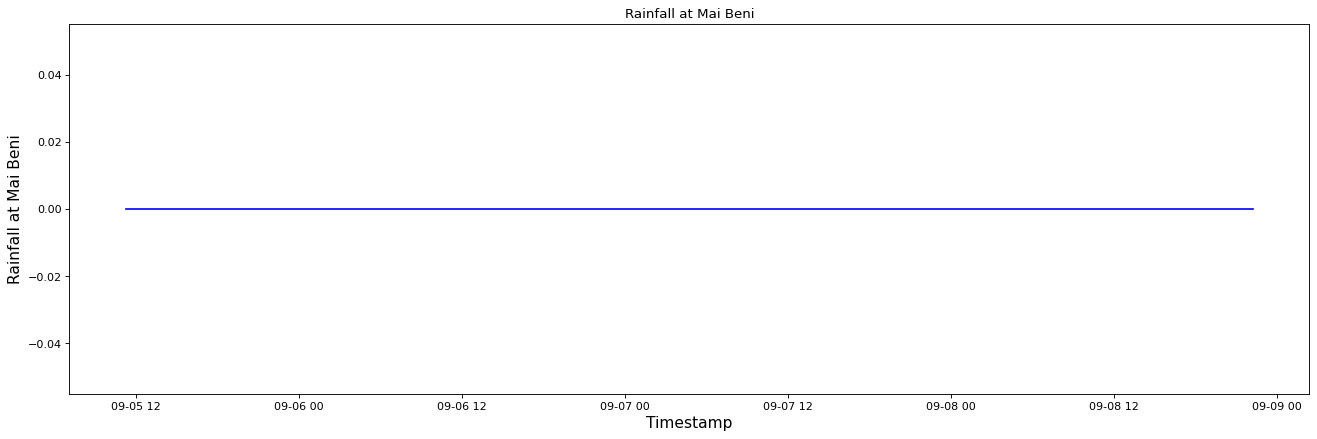

Rainfall at Nayabazar - Namsaling


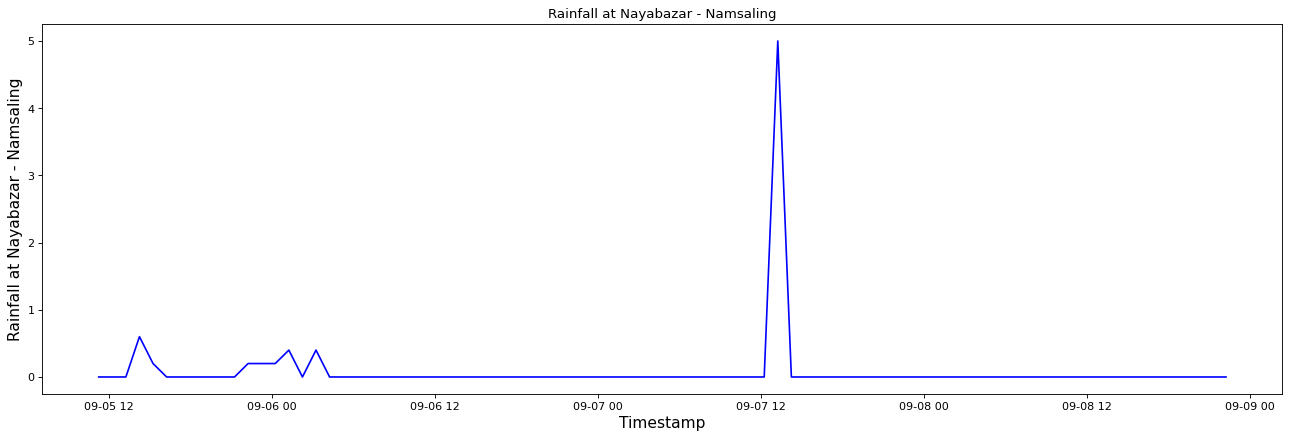

Rainfall at Pashupatingar


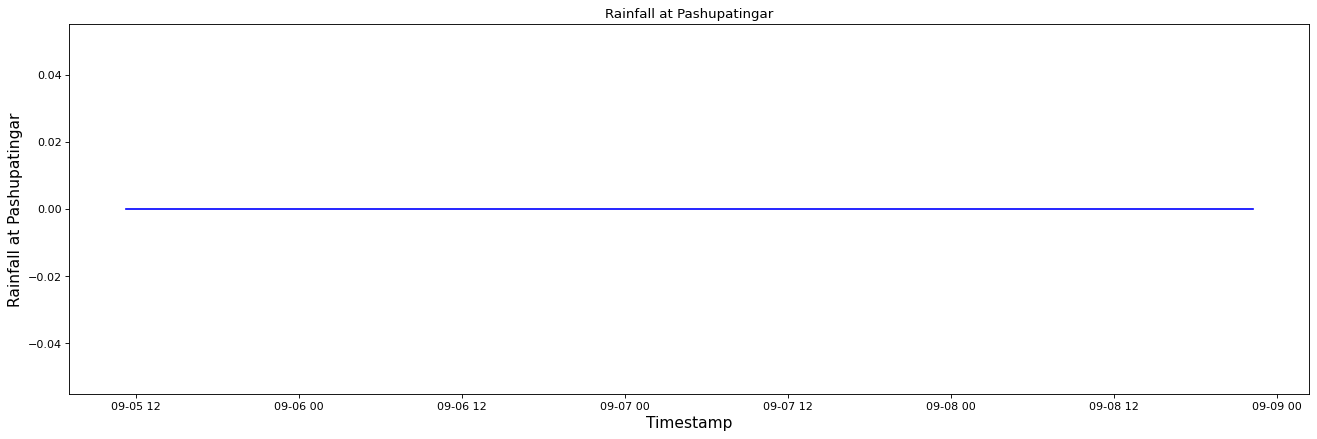

Rainfall at Sandakpur - Valley


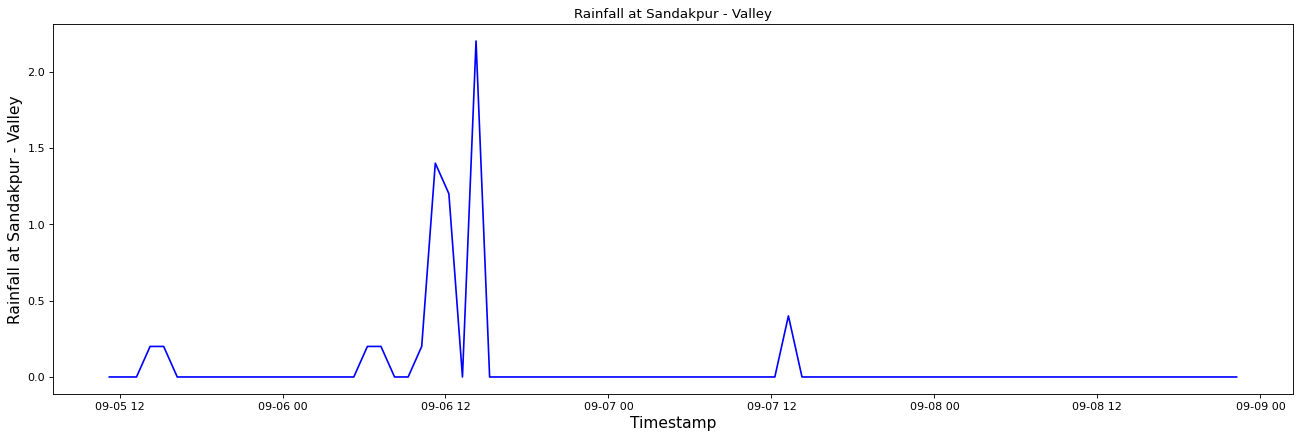

Water Level at Mai Khola


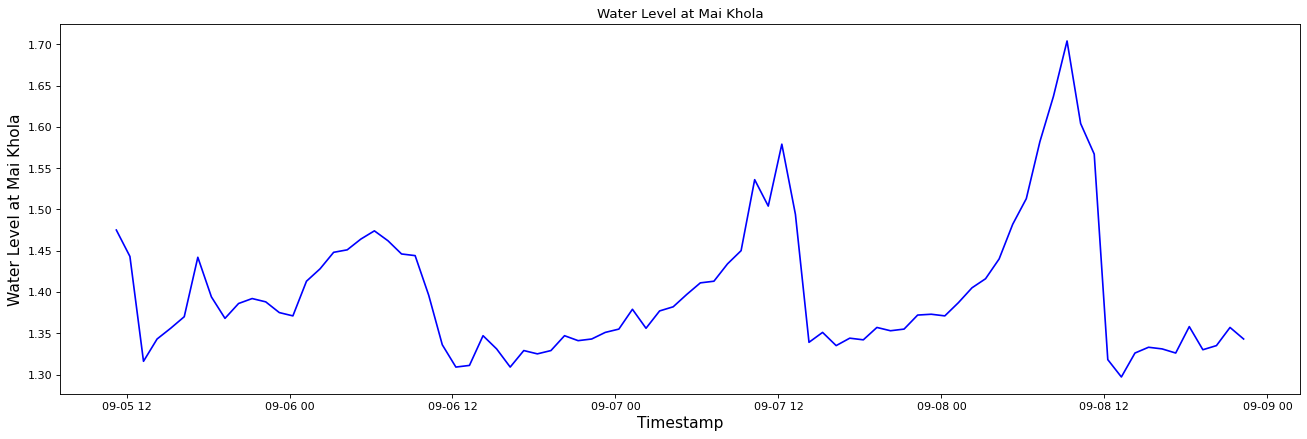

In [37]:
for column_name in df_filtered_hourly_reversed.columns:
  print(column_name)
  plot_rainfall_against_timestamp(column_name)

In [38]:
def interploate_missing_values_with_time(df: pd.DataFrame, method: str = 'time') -> pd.DataFrame:
    """
    Interpolates missing values in a DataFrame using the specified method.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to interpolate.
    - method (str): The interpolation method to use. Default is 'time'.
    
    Returns:
    - pd.DataFrame: The DataFrame with interpolated values.
    """
    if method not in ['linear', 'time', 'index', 'nearest', 'polynomial', 'spline']:
        raise ValueError("Invalid interpolation method. Choose from 'linear', 'time', 'index', 'nearest', 'polynomial', 'spline'.")
    
    df.interpolate(method=method, inplace=True)
    return df


In [39]:
df_filtered_hourly_reversed.isna().sum()

Rainfall at Mai Beni                 0
Rainfall at Nayabazar - Namsaling    0
Rainfall at Pashupatingar            0
Rainfall at Sandakpur - Valley       0
Water Level at Mai Khola             0
dtype: int64

In [40]:
import joblib
scaler = joblib.load('scaler.save')

In [41]:
df_filtered_hourly_reversed.tail()

,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
2024-09-08 18:15:00,0.0,0.0,0.0,0.0,1.358000
2024-09-08 19:15:00,0.0,0.0,0.0,0.0,1.330000
2024-09-08 20:15:00,0.0,0.0,0.0,0.0,1.335000
2024-09-08 21:15:00,0.0,0.0,0.0,0.0,1.356999
2024-09-08 22:15:00,0.0,0.0,0.0,0.0,1.342999


In [42]:
df_filtered_hourly_reversed.shape

(84, 5)

In [43]:
def last_48_hours(df):
    df_last_48_hours = df.tail(48)
    return df_last_48_hours

In [44]:
df_filtered_hourly_48 = last_48_hours(df_filtered_hourly_reversed)

In [45]:
df_filtered_hourly_48.head(24)


,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
2024-09-06 23:15:00,0.0,0.0,0.0,0.0,1.351000
2024-09-07 00:15:00,0.0,0.0,0.0,0.0,1.355000
2024-09-07 01:15:00,0.0,0.0,0.0,0.0,1.379000
2024-09-07 02:15:00,0.0,0.0,0.0,0.0,1.356000
2024-09-07 03:15:00,0.0,0.0,0.0,0.0,1.377000
2024-09-07 04:15:00,0.0,0.0,0.0,0.0,1.382000
2024-09-07 05:15:00,0.0,0.0,0.0,0.0,1.396999
2024-09-07 06:15:00,0.0,0.0,0.0,0.0,1.410999
2024-09-07 07:15:00,0.0,0.0,0.0,0.0,1.412999
2024-09-07 08:15:00,0.0,0.0,0.0,0.0,1.434000


In [46]:
df_filtered_hourly_48.shape

(48, 5)

In [47]:
df_scaled = scaler.transform(df_filtered_hourly_48)

/home/nightwing/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [48]:
df_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.32639746],
       [0.        , 0.        , 0.        , 0.        , 0.32763961],
       [0.        , 0.        , 0.        , 0.        , 0.33509308],
       [0.        , 0.        , 0.        , 0.        , 0.32795029],
       [0.        , 0.        , 0.        , 0.        , 0.334472  ],
       [0.        , 0.        , 0.        , 0.        , 0.33602484],
       [0.        , 0.        , 0.        , 0.        , 0.34068303],
       [0.        , 0.        , 0.        , 0.        , 0.34503084],
       [0.        , 0.        , 0.        , 0.        , 0.34565191],
       [0.        , 0.        , 0.        , 0.        , 0.35217392],
       [0.        , 0.        , 0.        , 0.        , 0.3571428 ],
       [0.        , 0.        , 0.        , 0.        , 0.38385071],
       [0.        , 0.        , 0.        , 0.        , 0.37391295],
       [0.        , 0.        , 0.        , 0.        , 0.39720482],
       [0.        , 0.11160714, 0.

In [49]:
# import numpy as np

# def create_sequences(data, n_steps_in, n_steps_out):
#     X, y = [], []
#     for i in range(len(data) - n_steps_in - n_steps_out + 1):
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
        
#         # Input sequence includes all 5 features (including target variable)
#         seq_x = data[i:end_ix, :]
        
#         # Output sequence is only the target variable for the next n_steps_out
#         seq_y = data[end_ix:out_end_ix, -1]
        
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)


In [50]:
def preprocess_data(df, scaler, n_steps_in):
    # Ensure the dataframe has the same columns as the training data
    # Scale the data
    df_scaled = scaler.transform(df)
    
    # Create sequences
    X = []
    for i in range(len(df_scaled) - n_steps_in + 1):
        X.append(df_scaled[i:i+n_steps_in, :])
    
    return np.array(X)

In [51]:
def postprocess_predictions(predictions, scaler):
    # Convert predictions to a 2D array (n_samples, 1)
    predictions = np.array(predictions).reshape(-1, 1)
    
    # Create dummy columns for the rainfall data (which won't be used)
    dummy_rainfall = np.zeros((predictions.shape[0], 4))  # 4 columns for rainfall

    # Concatenate the predictions (water levels) with the dummy rainfall data
    predictions_with_rainfall = np.hstack((dummy_rainfall, predictions))

    # Apply inverse_transform
    inverse_scaled_predictions = scaler.inverse_transform(predictions_with_rainfall)

    # Return only the water level column
    return inverse_scaled_predictions[:, -1]


In [52]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model = load_model('models/best_4_model_v2.h5', custom_objects={'mse':mean_squared_error})

2024-09-10 14:21:46.997286: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 14:21:47.008431: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 14:21:47.066496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 14:21:47.162461: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 14:21:47.189930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 14:21:47.233546: I tensorflow/core/platform/cpu_feature_gu

2024-09-10 14:21:50.947551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [53]:
# df = interploate_missing_values_with_time(df, 'time')

In [54]:
def predict_water_levels(df, n_steps_in, n_steps_out):
    # Fetch and preprocess data
    df = df_filtered_hourly_48

    # Ensure you use the same scaler as the one used during training
    X = preprocess_data(df, scaler, n_steps_in)

    # Make predictions for the next 4 hours
    predictions = model.predict(X)

    # Post-process predictions (inverse transform to get actual water levels)
    predictions = postprocess_predictions(predictions, scaler)

    return predictions

In [55]:
n_steps_in = 48 
n_steps_out = 4

In [56]:
# df = pd.read_csv('/home/nightwing/Codes/LSTM_for_waterlevel_prediction/test_data/last_48_hours_data.csv')

In [57]:
df_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.32639746],
       [0.        , 0.        , 0.        , 0.        , 0.32763961],
       [0.        , 0.        , 0.        , 0.        , 0.33509308],
       [0.        , 0.        , 0.        , 0.        , 0.32795029],
       [0.        , 0.        , 0.        , 0.        , 0.334472  ],
       [0.        , 0.        , 0.        , 0.        , 0.33602484],
       [0.        , 0.        , 0.        , 0.        , 0.34068303],
       [0.        , 0.        , 0.        , 0.        , 0.34503084],
       [0.        , 0.        , 0.        , 0.        , 0.34565191],
       [0.        , 0.        , 0.        , 0.        , 0.35217392],
       [0.        , 0.        , 0.        , 0.        , 0.3571428 ],
       [0.        , 0.        , 0.        , 0.        , 0.38385071],
       [0.        , 0.        , 0.        , 0.        , 0.37391295],
       [0.        , 0.        , 0.        , 0.        , 0.39720482],
       [0.        , 0.11160714, 0.

In [58]:
df.shape

(667, 7)

In [59]:
prediction_next_4_hours = predict_water_levels(df_scaled,n_steps_in, n_steps_out )

/home/nightwing/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [60]:
print(prediction_next_4_hours)

[1.33921038 1.33601614 1.33699631 1.33688519]


In [61]:
print("predicted values ", prediction_next_4_hours)
print("Predicted values shape", prediction_next_4_hours.shape)

predicted values  [1.33921038 1.33601614 1.33699631 1.33688519]
Predicted values shape (4,)


In [62]:
df_from_experiments = pd.read_csv("/home/nightwing/Codes/LSTM_for_waterlevel_prediction/test_data/last_48_hours_data.csv")

In [63]:
df_from_experiments.head()

,Unnamed: 0,Rainfall at Mai Beni,Rainfall at Nayabazar - Namsaling,Rainfall at Pashupatingar,Rainfall at Sandakpur - Valley,Water Level at Mai Khola
0,2024-09-09 01:25:00,0.0,NaN,0.0,NaN,1.365999
1,2024-09-09 00:25:00,0.0,NaN,0.0,NaN,1.384000
2,2024-09-08 23:25:00,0.0,NaN,0.0,NaN,1.396999
3,2024-09-08 22:25:00,0.0,NaN,0.0,NaN,1.358999
4,2024-09-08 21:25:00,0.0,NaN,0.0,NaN,1.341000


In [72]:
def get_prediction(df):
    df_reordered = reorder_dataframe(df)
    df_formatted_timestamp = convert_timestamps(df_reordered, 'Timestamp')
    df_datetime_index = set_datetime_index(df_formatted_timestamp, 'Timestamp')
    df_filtered_hourly = create_new_dataframe_with_reduced_timestamps(df_datetime_index)
    df_interpolated = interploate_missing_values_with_time(df_filtered_hourly, 'time')
    df_last_48_hours_data = last_48_hours(df_interpolated)
    prediction_next_4_hours = predict_water_levels(df_last_48_hours_data, n_steps_in, n_steps_out)
    return prediction_next_4_hours

    

In [73]:
prediction_using_funtion = get_prediction(df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/tmp/ipykernel_19765/4041213274.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_df.index = pd.date_range(end=df.index[-1], periods=len(new_df), freq=f'-{hours}H')
/home/nightwing/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [70]:
def preprocess_data(df, scaler, n_steps_in):
    # Ensure the dataframe has the same columns as the training data
    # Scale the data
    df_scaled = scaler.transform(df)
    
    # Create sequences
    X = []
    for i in range(len(df_scaled) - n_steps_in + 1):
        X.append(df_scaled[i:i+n_steps_in, :])
    
    return np.array(X)

def postprocess_predictions(predictions, scaler):
    # Convert predictions to a 2D array (n_samples, 1)
    predictions = np.array(predictions).reshape(-1, 1)
    
    # Create dummy columns for the rainfall data (which won't be used)
    dummy_rainfall = np.zeros((predictions.shape[0], 4))  # 4 columns for rainfall

    # Concatenate the predictions (water levels) with the dummy rainfall data
    predictions_with_rainfall = np.hstack((dummy_rainfall, predictions))

    # Apply inverse_transform
    inverse_scaled_predictions = scaler.inverse_transform(predictions_with_rainfall)

    # Return only the water level column
    return inverse_scaled_predictions[:, -1]

In [71]:
def predict_water_levels(df, n_steps_in, n_steps_out):
    # Fetch and preprocess data

    # Ensure you use the same scaler as the one used during training
    X = preprocess_data(df, scaler, n_steps_in)

    # Make predictions for the next 4 hours
    predictions = model.predict(X)

    # Post-process predictions (inverse transform to get actual water levels)
    predictions = postprocess_predictions(predictions, scaler)

    return predictions

n_steps_in = 48 
n_steps_out = 4

In [74]:
print(prediction_using_funtion)

[1.43321285 1.4177419  1.40852864 1.40131699]


In [66]:
prediction_of_df_from_experiments = predict_water_levels(df_from_experiments,n_steps_in, n_steps_out )

/home/nightwing/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [67]:
print(prediction_of_df_from_experiments)
print("predicted values ", prediction_next_4_hours)

[1.33921038 1.33601614 1.33699631 1.33688519]
predicted values  [1.33921038 1.33601614 1.33699631 1.33688519]


In [75]:
df_new = pd.read_csv("/home/nightwing/Codes/LSTM_for_waterlevel_prediction/data/data_20240910_144355.csv")

In [81]:
df_new.head(5)

,Timestamp,Rainfall at Nayabazar - Namsaling,Rainfall at Sandakpur - Valley,Water Level at Mai Khola,Rainfall at Mai Beni,Rainfall at Pashupatingar,Rainfall at Sandakpur - Hilltop
0,2024-09-04T00:00:00+00:00,0.0,0.0,NaN,0.0,0.0,0.0
1,2024-09-04T00:05:00+00:00,NaN,NaN,1.344000,0.0,0.0,0.0
2,2024-09-04T00:15:00+00:00,0.0,0.0,1.342999,0.0,0.0,0.0
3,2024-09-04T00:25:00+00:00,NaN,NaN,1.348000,0.0,0.0,0.0
4,2024-09-04T00:30:00+00:00,0.0,0.0,NaN,0.0,0.0,0.0


In [77]:
df_new.isna().sum()

Timestamp                              0
Rainfall at Nayabazar - Namsaling    298
Rainfall at Sandakpur - Valley       298
Water Level at Mai Khola             149
Rainfall at Mai Beni                   0
Rainfall at Pashupatingar              0
Rainfall at Sandakpur - Hilltop        0
dtype: int64

In [79]:
df_new.shape

(596, 7)

In [82]:
import pandas as pd
import numpy as np

# Generate a timestamp range for the past 48 hours with 1-hour intervals
timestamps = pd.date_range(end=pd.Timestamp.now(), periods=48, freq='H')

# Generate random data for rainfall and water level, avoiding missing values
# Using plausible values for rainfall (0-50 mm) and water level (0-5 meters)
data = {
    "Timestamp": timestamps,
    "Rainfall at Nayabazar - Namsaling": np.random.uniform(0, 50, len(timestamps)),
    "Rainfall at Sandakpur - Valley": np.random.uniform(0, 50, len(timestamps)),
    "Water Level at Mai Khola": np.random.uniform(0, 5, len(timestamps)),
    "Rainfall at Mai Beni": np.random.uniform(0, 50, len(timestamps)),
    "Rainfall at Pashupatingar": np.random.uniform(0, 50, len(timestamps)),
    "Rainfall at Sandakpur - Hilltop": np.random.uniform(0, 50, len(timestamps)),
}

# Create a DataFrame
fake_data_df = pd.DataFrame(data)

# Optionally, display the first few rows to verify
print(fake_data_df.head())

# Save the data to a CSV file if needed
fake_data_df.to_csv('fake_rainfall_waterlevel_data.csv', index=False)


                   Timestamp  Rainfall at Nayabazar - Namsaling  \
0 2024-09-08 15:59:14.219827                          14.017100   
1 2024-09-08 16:59:14.219827                           3.698922   
2 2024-09-08 17:59:14.219827                          15.499628   
3 2024-09-08 18:59:14.219827                          42.629796   
4 2024-09-08 19:59:14.219827                           8.096728   

   Rainfall at Sandakpur - Valley  Water Level at Mai Khola  \
0                       12.918342                  2.017482   
1                       10.420033                  4.507707   
2                        9.427041                  3.539659   
3                       31.431649                  0.384338   
4                       12.081485                  1.202065   

   Rainfall at Mai Beni  Rainfall at Pashupatingar  \
0              0.580746                   5.565288   
1             21.131611                  36.932308   
2             12.547444                  14.478444   
3 

/tmp/ipykernel_19765/2017209334.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(end=pd.Timestamp.now(), periods=48, freq='H')


In [83]:
fake_data_df.head()

,Timestamp,Rainfall at Nayabazar - Namsaling,Rainfall at Sandakpur - Valley,Water Level at Mai Khola,Rainfall at Mai Beni,Rainfall at Pashupatingar,Rainfall at Sandakpur - Hilltop
0,2024-09-08 15:59:14.219827,14.017100,12.918342,2.017482,0.580746,5.565288,27.262587
1,2024-09-08 16:59:14.219827,3.698922,10.420033,4.507707,21.131611,36.932308,31.468631
2,2024-09-08 17:59:14.219827,15.499628,9.427041,3.539659,12.547444,14.478444,3.632968
3,2024-09-08 18:59:14.219827,42.629796,31.431649,0.384338,15.396991,26.545040,24.122267
4,2024-09-08 19:59:14.219827,8.096728,12.081485,1.202065,33.883530,12.794084,20.959802
